# Spatial Tournament Examples : Circle Topology

In this notebook we will be performing a circle tournament. Ten random players
are selected by the list of strategies in Axelrod. Afterwards these players are allocated
into a circle network where each player competes with their two neughboors. Then we plot the results.


In [20]:
# Python 3 
%matplotlib inline

import matplotlib.pyplot as plt
import random

# package for creation and visuliazation of networks
import networkx as nx 

import axelrod as axl

In [13]:
strategies = [s() for s in axl.ordinary_strategies]

In [14]:
players = random.sample(strategies, 10)

In [15]:
G = nx.cycle_graph(len(players))

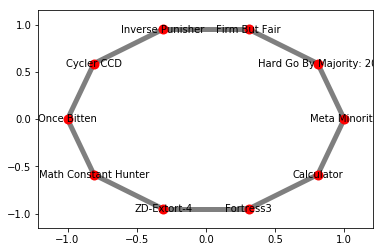

In [16]:
pos = nx.circular_layout(G)
# for the nodes 
nx.draw_networkx_nodes(G,pos,
                       node_color='r',
                       node_size=100
                       )
# for the edges
nx.draw_networkx_edges(G,pos,
                       width=5, alpha = 0.5)
# using labels
labels={}
for i in range(len(players)):
    labels[i]= '%s' % (players[i])

nx.draw_networkx_labels(G,pos,labels,font_size=10)
plt.show()

In [17]:
edges = G.edges()
tournament = axl.Tournament(players, edges=G.edges(), repetitions=1)
results = tournament.play(processes=1)

In [18]:
results.ranked_names

['Inverse Punisher',
 'Hard Go By Majority: 20',
 'Once Bitten',
 'Meta Minority',
 'Calculator',
 'ZD-Extort-4',
 'Math Constant Hunter',
 'Cycler CCD',
 'Firm But Fair',
 'Fortress3']

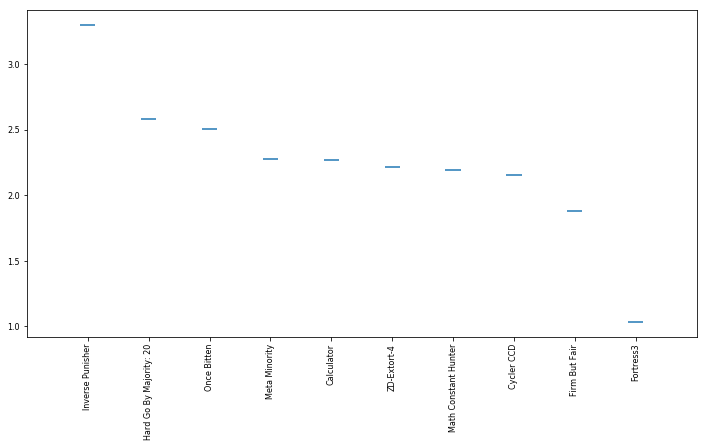

In [19]:
plot = axl.Plot(results)
plot.boxplot();